## 5.2.2 Understanding model fitting process: Linear regression as an example

In this exercise, we will walk through the model fitting process to get a better understanding of what it actually means. 

- We’ll motivate this process using linear regression, one of the best-known mathematical models, which is familiar from basic statistics.  
- The intent here is to illustrate the process of model fitting in sci-kit learn.

### 1. Generating synthetic data
In order to have data to work with, we generate our own synthetic data. 

- Synthetic data is a valuable learning tool for exploring models, illustrating mathematical concepts, and conducting experiments to test various ideas. 

In order to generate synthetic data, we shall illustrate how to use NumPy's random library to generate random numbers, as well as we shall use matplotlib's functions (scatter and plot) to create scatter and line plots. Later, we shall also use scikit-learn for modeling linear regression.

**First**, we use NumPy to make a one-dimensional array of feature values, X, consisting of 2,000 random real numbers between 0 and 20. We use a seed for the random number generator. 

**Next**, we use the .uniform method of default_rng (random number generator), which draws from the uniform distribution:

- it's equally likely to choose any number between low (inclusive) and high (exclusive), and will return an array of whatever size you specify. We create a one-dimensional array with 2,000 elements, then examine the first 10. We can do all that using the following code:

In [1]:
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low=0.0, high=20.0, size=(2000,))
print(X[0:10])

[ 4.54672045  6.33516679 15.94730915 13.52509342  7.82219101  6.65627856
 11.96617507  3.73468371 13.45512088 18.83605731]


### 2. Data for linear regression (response variable)
To build the linear regression model, we need also a response variable.

For this example, we'll generate data that follows the linear regression model: the data will exhibit a linear trend against the feature but have normally distributed errors:

_y= ax + b + N(μ,σ)_
- a is the slope, 
- b is the intercept, 
- the Gaussian noise has a mean of μ with a standard deviation of σ. 

In order to write code to implement this formula, we need to make a vector of responses, y, which are calculated as the slope, a, times the feature array, x, plus the intercept b plus some Gaussian noise, (using NumPy). The noise will be an array of 2,000 data points with the same shape (size) as the feature array, X, where the mean of the noise (loc) is 0 and the standard deviation (scale) is 1. This will add a little "spread" to our linear data:

In [2]:
slope = 0.2
intercept = -1.2
y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(2000,)) 

Now, we'd like to visualise this data to get a better understanding. 

We will use matplotlib to plot y against the feature X as a scatter plot. 

First, we use .rcParams to set the resolution (dpi = dots per inch). 

Then we create the scatter plot with plt.scatter, where X and y are the first two arguments, respectively, and the s argument specifies a size for the dots.

This code can be used for plotting:

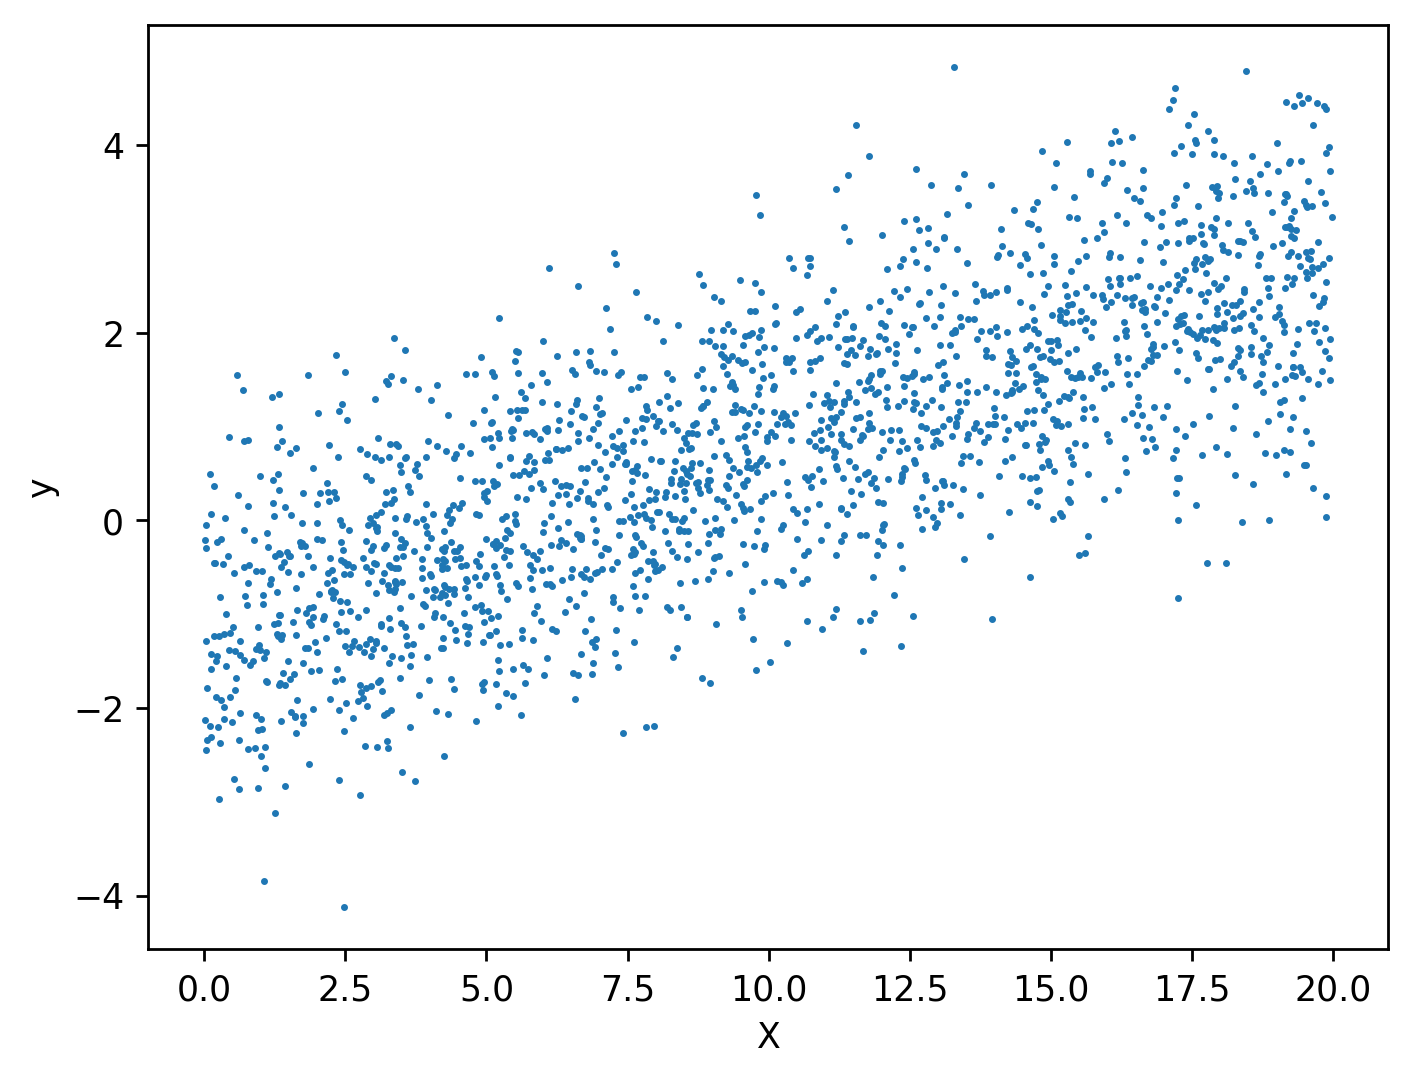

In [3]:
import matplotlib.pyplot as plt #import plotting package
import matplotlib as mpl #additional plotting functionality and parameters
mpl.rcParams['figure.dpi'] = 250
plt.scatter(X,y,s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('fig')
plt.show()

## 3. Linear regression modeling
Now, we shall take the synthetic generated data and determine a line that best fits the data, or linear regression, using scikit-learn. 

Import the linear regression model and create an object

The first step is to import a linear regression model class from scikit-learn and create an object from it. 

As with any model class, you should observe what all the default options are. For linear regression, there are not many options to specify: you will use the defaults for this exercise. The default settings include fit_intercept=True, meaning the regression model includes an intercept. 

Perform the following steps to complete the modeling process:

1. Run the following code to import the linear regression model class, instantiate it with all the default options and print its details:
    
    
    From the output, we notice that no options are displayed since we used all the defaults.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
print(lin_reg)

LinearRegression()


_Fitting the Model_

Now we can fit the model using our synthetic data, (remembering to reshape the feature array so that samples are along the first dimension. 

After fitting the linear regression model, we can examine `lin_reg.intercept_`, which contains the intercept of the fitted model, as well as `lin_reg.coef_,` which contains the slope.

2. Run this code to fit the model and examine the coefficients:

In [5]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1546801413339605
[0.19513902]


**The slope and intercept of the fitted model**

We shall notice the slope and intercept of the fitted model are close to the slope and intercept we indicated earlier when creating the model. Indeed this is because, in the fitted model, the obtained values of slope and intercept are approximations as the fitting is done on noisy data. 


_Employ the fitted model for predictions_

We can use the fitted model to make predictions on feature values. Here, we do this using the same data used to fit the model: the array of features, `X`. We obtain the output of this as a variable, `y_pred`. 

3. Run this code to make predictions:

In [6]:
y_pred = lin_reg.predict(X.reshape(-1,1))

We can plot the predictions, y_pred, against feature X as a line plot over the scatter plot of the feature and response variable data.

Here, we add plt.plot(X,y_pred,'g'), which produces a line plot, to plot the feature and the model-predicted response values for the model training data. Notice that we follow the X and y_pred data with 'g'. This keyword argument causes the line to be green.

4. This code can be used to plot the raw data, as well as the fitted model predictions on this data:
    It should be noted from the output that the plot looks like a line of best fit.



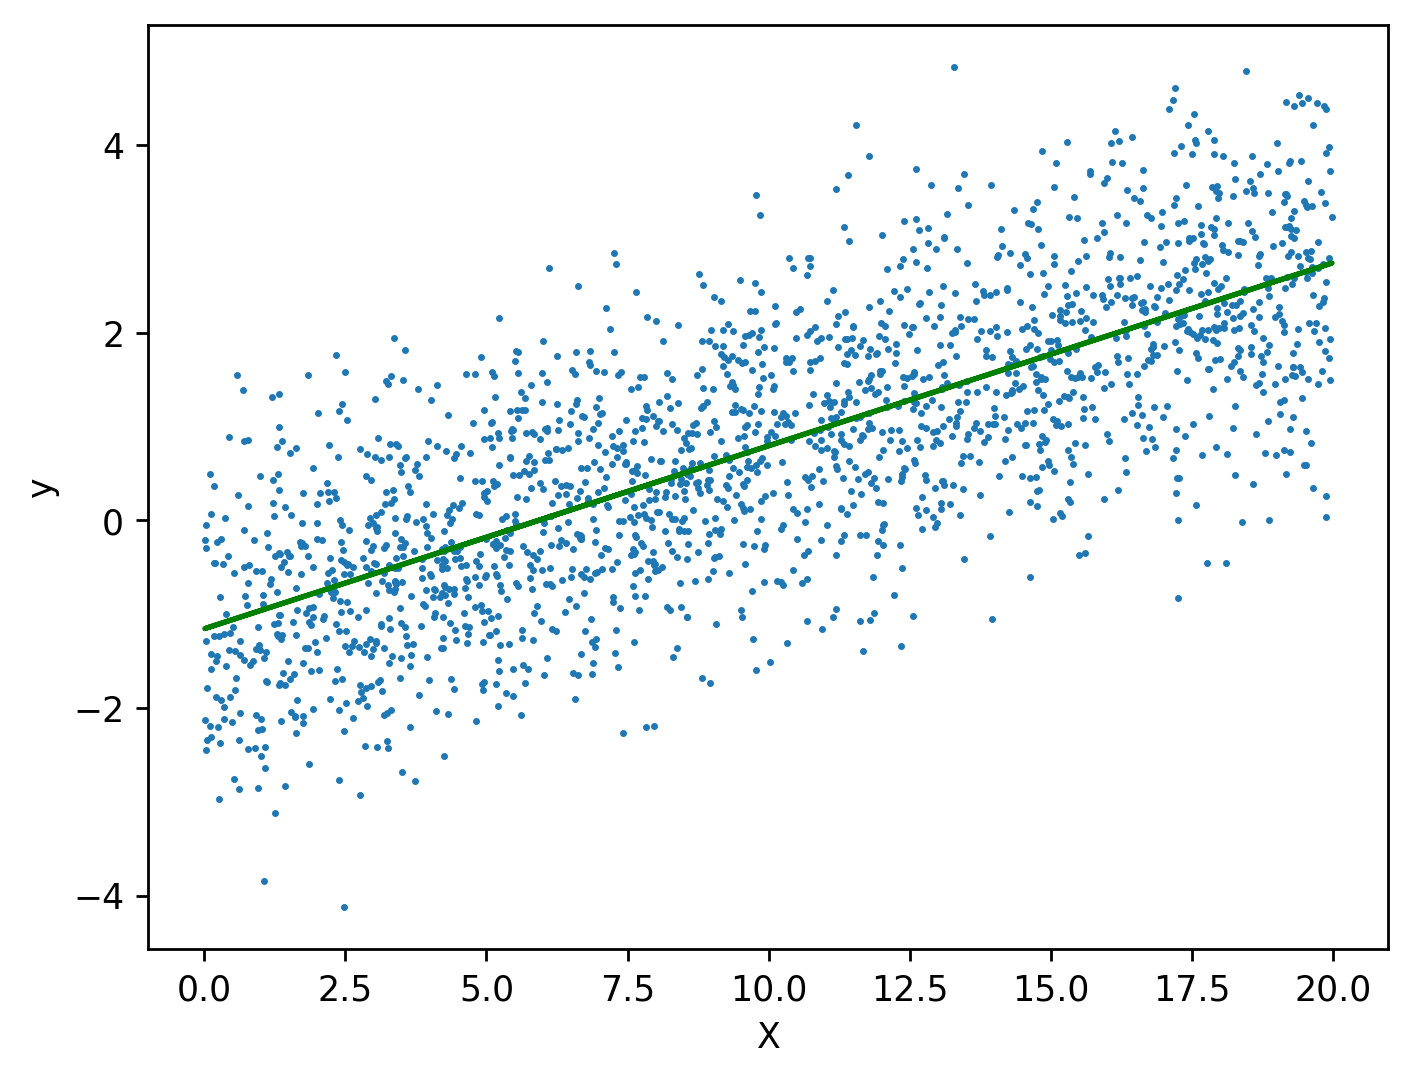

In [7]:
import matplotlib.pyplot as plt #import plotting package
import matplotlib as mpl #additional plotting functionality and parameters
mpl.rcParams['figure.dpi'] = 250
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'g')
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('fig')
plt.show()

### Summary

In this exercise, we made predictions on the same data X that we used to train the model. Also, we are seeing how the model "fits" the same data that it was trained on, while in the previous logistic regression modeling, we examined model predictions on new, unseen data.

In machine learning, we are usually concerned with predictive capabilities: we want models that can help us know the outcomes of future scenarios.

However, it turns out that model predictions on both the training data used to fit the model and the test data, which was not used to fit the model, are important for understanding how modeling operates. 